# Problem description

To Predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

# DataSet

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

•	slope_of_peak_exercise_st_segment (type: int): An electrocardiography read out indicating quality of blood flow to the heart

•	thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

•	resting_blood_pressure (type: int): resting blood pressure

•	chest_pain_type (type: int): chest pain type (4 values)

•	num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

•	fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

•	resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

•	serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

•	oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

•	sex (type: binary): 0: female, 1: male

•	age (type: int): age in years

•	max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

•	exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


In [225]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

## Importing Data

In [226]:
label=pd.read_csv('labels.csv')
label

#label contains patient ID and the target ie. if heart disease is present or not

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


heart_disease_present = 0 indicates no heart disease present\
heart_disease_present = 1 indicates heart disease present\

###### This is a classification problem with heart_disease_present value (target) having values '0' and '1'

In [227]:
values=pd.read_csv('values.csv')
values

#values contains Patient ID and 13 features that are considered to predict the presence of heart disease

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [228]:
# Adding our target heart_disease_present to dataframe values

values['heart_disease_present']=label.heart_disease_present
values

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# EDA

## - Basic Checks

In [229]:
values.shape

(180, 15)

In [230]:
values.duplicated().sum()

#no duplicates present

0

In [231]:
values.isnull().sum()

#no null values are present

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [232]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [233]:
# dropping patient_id as it is unique to each patient and is not required 

values.drop(['patient_id'],axis=1,inplace=True)
values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [234]:
Counter(values.thal)

Counter({'normal': 98, 'reversible_defect': 74, 'fixed_defect': 8})

## - Visualizing Data

In [235]:
values.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

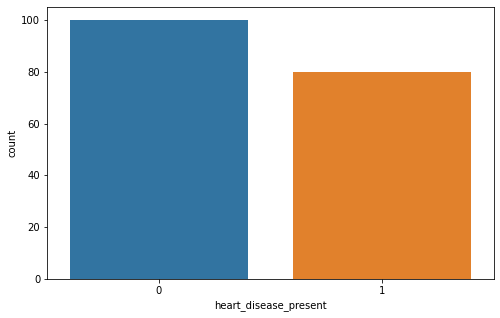

In [236]:
plt.figure(figsize=(8,5))
sb.countplot(values.heart_disease_present)

###### Out of 180 patients 80 patients have heart related diesease

C:\Users\anoop\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


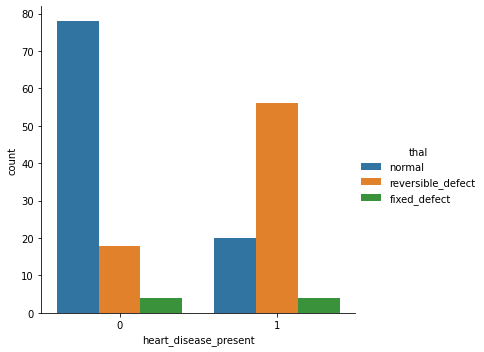

In [237]:
sb.factorplot('heart_disease_present', data=values, hue='thal', kind='count')

###### People with normal thal are less likely to have to have heart related disease
###### People with reversible defect thal are less likely to have to have heart related disease

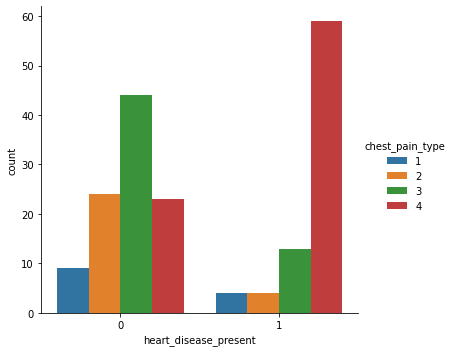

In [238]:
sb.factorplot('heart_disease_present', data=values, hue='chest_pain_type', kind='count')

###### Patient with chest_pain_type value 4 are more likely to have heart disease

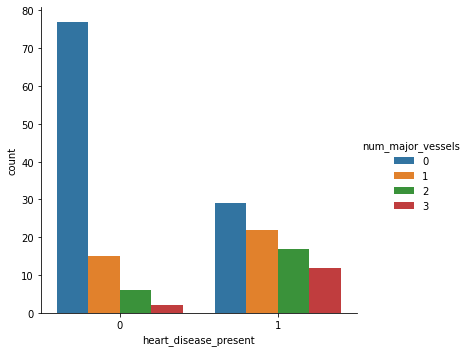

In [239]:
sb.factorplot('heart_disease_present', data=values, hue='num_major_vessels', kind='count')

###### People with number of major vessels value 0 are less likely to have heart disease

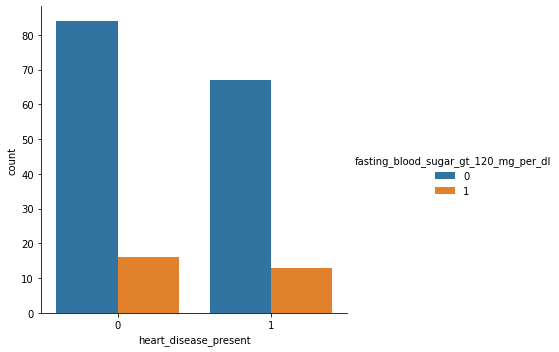

In [240]:
sb.factorplot('heart_disease_present', data=values, hue='fasting_blood_sugar_gt_120_mg_per_dl', kind='count')

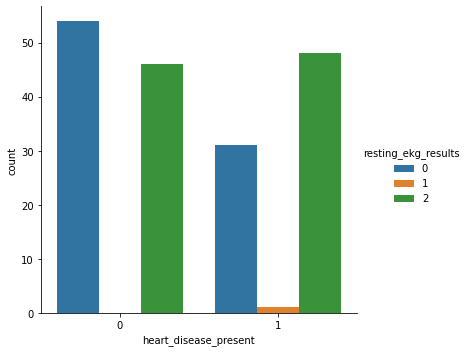

In [241]:
sb.factorplot('heart_disease_present', data=values, hue='resting_ekg_results', kind='count')

Nothing extraordinary here.

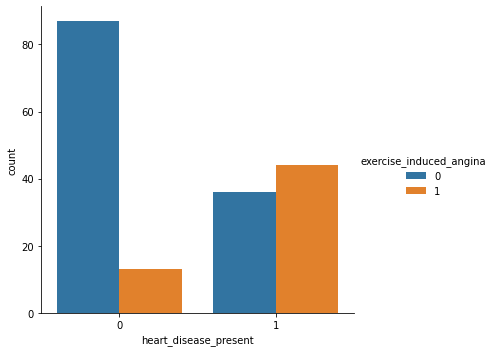

In [242]:
sb.factorplot('heart_disease_present', data=values, hue='exercise_induced_angina', kind='count')

###### People with exercise induced angina value 0 are less likely to have heart disease

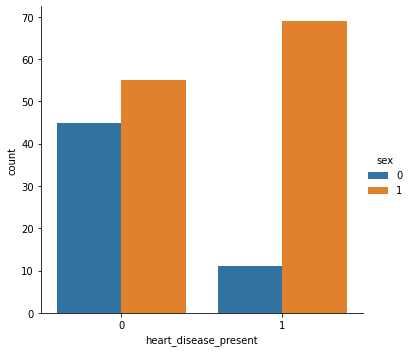

In [243]:
sb.factorplot('heart_disease_present', data=values, hue='sex', kind='count')

###### Males patients where seen to have heart disease more than females

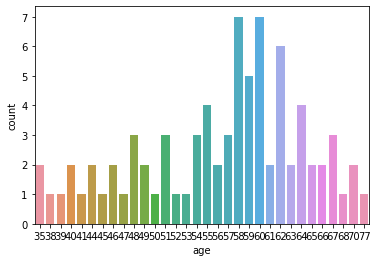

In [244]:
new=values[values.heart_disease_present==1]
sb.countplot(x='age',data=new)

###### Here patients between age group 55 and 64 are seen to have heart disease more compared to other age groups

In [245]:
values.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [246]:
print(values.corr()["heart_disease_present"].abs().sort_values(ascending=False))

heart_disease_present                   1.000000
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
max_heart_rate_achieved                 0.375352
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
Name: heart_disease_present, dtype: float64


###### This shows that fasting_blood_sugar_gt_120_mg_per_dl is very weakly correlated with heart_disease_present

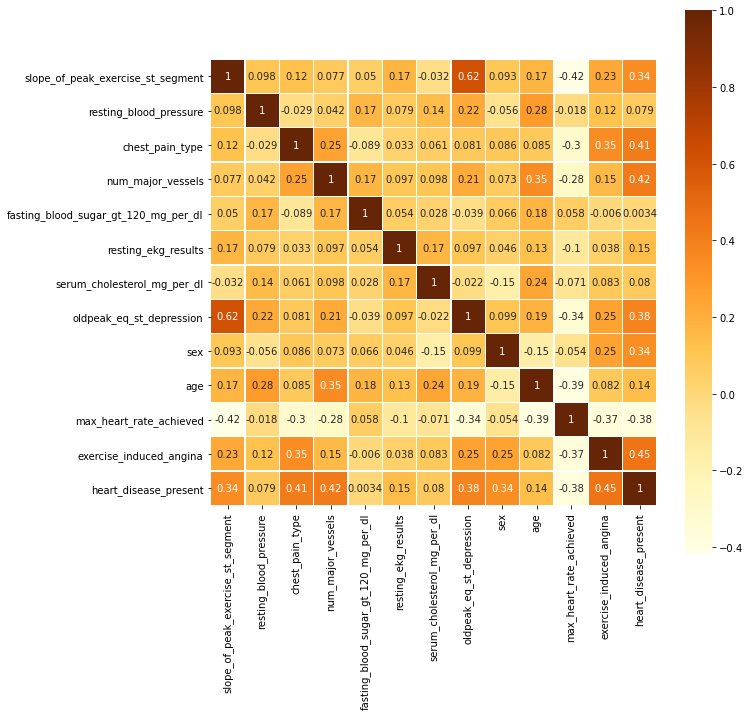

In [247]:
# Finding correlation using Seaborn Correlation Heatmap

plt.figure(figsize = (10,10))
sb.heatmap(values.corr(), annot = True,linewidths=0.5,square=True,cmap="YlOrBr")
plt.show()

## - Handling Categorical Value

In [248]:
values.select_dtypes(include=['object'])

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


### - Label Encoding

    Converting values with numbers

In [249]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

values.thal=enc.fit_transform(values.thal)

In [250]:
values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


# Creating Model 

In [251]:
values.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [252]:
# Defining X and y

X=values.iloc[:,:-1]
y=values.heart_disease_present

In [253]:
# Split dataset into train and test set in order to predict

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.2,random_state=32)

## - Fitting model using

    - Logistic Regression
    - Naïve Bayes
    - Stochastic Gradient Descent
    - K-Nearest Neighbours
    - Random Forest
    - Support Vector Machine

In [254]:
# Importing necessary packages

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### - Logistic Regression

In [255]:
# Define the model
lr_model=LogisticRegression()

# Train
lr_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=lr_model.predict(X_test)


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [256]:
score_lr = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.67 %


In [257]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,20,2
1,1,13


Out of 22 patients with no heart disease 20 have been correctly predicted and 2 mispredicted\
Out of 14 patients with heart disease 13 have been correctly predicted and 1 mispredicted

In [258]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.87      0.93      0.90        14

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.91        36
weighted avg       0.92      0.92      0.92        36



### - Naive Bayes

In [259]:
# Define the model
nb_model=BernoulliNB()

# Train
nb_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=nb_model.predict(X_test)

In [260]:
score_nb = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.11 %


In [261]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,19,3
1,2,12


Out of 22 patients with no heart disease 19 have been correctly predicted and 3 mispredicted\
Out of 14 patients with heart disease 12 have been correctly predicted and 2 mispredicted

In [262]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.80      0.86      0.83        14

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



### - Stochastic Gradient Descent

In [263]:
# Define the model
sgd_model=SGDClassifier()

# Train
sgd_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=sgd_model.predict(X_test)

In [264]:
score_sgd = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Stochastic Gradient Descent is: "+str(score_sgd)+" %")

The accuracy score achieved using Stochastic Gradient Descent is: 63.89 %


In [265]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,20,2
1,11,3


Out of 22 patients with no heart disease 20 have been correctly predicted and 2 mispredicted\
Out of 14 patients with heart disease 3 have been correctly predicted and 11 mispredicted

In [266]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.91      0.75        22
           1       0.60      0.21      0.32        14

    accuracy                           0.64        36
   macro avg       0.62      0.56      0.54        36
weighted avg       0.63      0.64      0.58        36



### - K-Nearest Neighbours(KNN)

In [267]:
# Define the model
knn_model=KNeighborsClassifier(n_neighbors=50)

# Train
knn_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=knn_model.predict(X_test)

In [268]:
score_knn = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using K-Nearest Neighbours is: "+str(score_knn)+" %")

The accuracy score achieved using K-Nearest Neighbours is: 69.44 %


In [269]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,20,2
1,9,5


Out of 22 patients with no heart disease 20 have been correctly predicted and 2 mispredicted\
Out of 14 patients with heart disease 5 have been correctly predicted and 9 mispredicted

In [270]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        22
           1       0.71      0.36      0.48        14

    accuracy                           0.69        36
   macro avg       0.70      0.63      0.63        36
weighted avg       0.70      0.69      0.66        36



### - Decision Tree

In [271]:
# Define the model
dt_model=DecisionTreeClassifier(max_depth=2)

# Train
dt_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=dt_model.predict(X_test)

In [272]:
score_dt = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.78 %


In [273]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,19,3
1,5,9


Out of 22 patients with no heart disease 19 have been correctly predicted and 3 mispredicted\
Out of 14 patients with heart disease 9 have been correctly predicted and 5 mispredicted

In [274]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.75      0.64      0.69        14

    accuracy                           0.78        36
   macro avg       0.77      0.75      0.76        36
weighted avg       0.78      0.78      0.77        36



### - Random Forest

In [275]:
# Define the model
rf_model=RandomForestClassifier(n_estimators=90,random_state=32)

# Train
rf_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=rf_model.predict(X_test)

In [276]:
score_rf = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 86.11 %


In [277]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,19,3
1,2,12


Out of 22 patients with no heart disease 19 have been correctly predicted and 3 mispredicted\
Out of 14 patients with heart disease 12 have been correctly predicted and 2 mispredicted

In [278]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.80      0.86      0.83        14

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [279]:
model=RandomForestClassifier(n_estimators=50,random_state=11,max_depth=16)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')
print(scores)
print("Average Accuracy:", scores.mean())
print("Std:",scores.std())

[0.75       0.86111111 0.80555556 0.77777778 0.83333333]
Average Accuracy: 0.8055555555555556
Std: 0.039283710065919325


### - Support Vector Machine

In [280]:
# Define the model
svc_model=SVC(C=600)

# Train
svc_model.fit(X_train,y_train)

# Predicting and storing output
y_predict=svc_model.predict(X_test)

In [281]:
score_svc = round(accuracy_score(y_predict,y_test)*100,2)

print("The accuracy score achieved using Support Vector Machine is: "+str(score_svc)+" %")

The accuracy score achieved using Support Vector Machine is: 86.11 %


In [282]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,20,2
1,3,11


Out of 22 patients with no heart disease 20 have been correctly predicted and 2 mispredicted\
Out of 14 patients with heart disease 11 have been correctly predicted and 3 mispredicted

In [283]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.85      0.79      0.81        14

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36



## Logistic Regression is giving good results compared to other models with an accuracy of 92%

# Random Search

In [290]:
from sklearn.model_selection import RandomizedSearchCV

C=np.linspace(1,200)
penalty=['l1','l2']
hyperparameters=dict(C=C,penalty=penalty)

rsearch=RandomizedSearchCV(lr_model,hyperparameters,n_iter=100,random_state=41)
rsearch.fit(X,y)

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linea

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83333333        nan 0.82777778        nan 0.82777778
        nan 0.82777778        nan 0.82777778        nan 0.82222222
        nan 0.82777778        nan 0.82222222        nan 0.82777778
        nan 0.82777778        nan 0.82222222        nan 0.82777778
        nan 0.82222222        nan 0.82777778        nan 0.82777778
        

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([  1.        ,   5.06122449,   9.12244898,  13.18367347,
        17.24489796,  21.30612245,  25.36734694,  29.42857143,
        33.48979592,  37.55102041,  41.6122449 ,  45.67346939,
        49.73469388,  53.79591837,  57.85714286,  61.91836735,
        65.97959184,  70.04081633,  74.10204082,  78.16326531,
        82.2244898 ,  86.28571429,  90.346...
        98.46938776, 102.53061224, 106.59183673, 110.65306122,
       114.71428571, 118.7755102 , 122.83673469, 126.89795918,
       130.95918367, 135.02040816, 139.08163265, 143.14285714,
       147.20408163, 151.26530612, 155.32653061, 159.3877551 ,
       163.44897959, 167.51020408, 171.57142857, 175.63265306,
       179.69387755, 183.75510204, 187.81632653, 191.87755102,
       195.93877551, 200.        ]),
                                        'penalty': ['l1', 'l2']},
                   random_state=41)

In [291]:
print(rsearch.best_params_)

{'penalty': 'l2', 'C': 179.69387755102042}


In [292]:
rsearch.best_score_ 

0.8388888888888889